<a href="https://colab.research.google.com/github/Dhanasree-Rajamani/255-Project-DataMining/blob/main/255_Insurance_Premium_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title
from IPython.core.display import display, HTML, Javascript
import IPython.display as py_display
htmlt = '''
<center><h1 style="font-family: parklane">How much Health Insurance Premium should I pay 🧐 ?</h1></center>
<center><img src="https://blueshieldpk.com/assets/img/products/pic-29.png" width="800" 
     height="500"></center>
'''

h = display(HTML(htmlt))
py_display.display_javascript(h)

#🩺 Health Insurance Premium Prediction Project

* Data Preparation
* EDA
* Feature Engineering
* Training a Model

#1.  🧳 Business Understanding
* Health insurance makes up one-third of India's GDP, and since everyone needs medical care at some point, it is a crucial sector of the economy. For most people, health insurance represents a significant annual financial commitment. If a person has health insurance, they are not entirely liable for the expense of any medical services acquired as a result of sickness, injury, or accident.

* A practical technique for enhancing health care transparency is to predict the cost of people's medical insurance.

# 2. 💡 Data Understanding

* Check for Missingness.
* Visualize the distribution of each feature
* Understand the Correlation between each feature
* Get a picture of how premium is effected by each feature

In [82]:
!pip install pycaret
!pip install Jinja2
!pip install markupsafe==2.0.1
!pip install numpy
!pip install lazypredict
!pip install featurewiz --ignore-installed --no-deps
!pip install --upgrade category_encoders
!pip install numba --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numba-0.54.1-cp38-cp38-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.3 MB)
  Using cached llvmlite-0.37.0-cp38-cp38-manylinux2014_x86_64.whl (26.3 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1
    Uninstalling llvmlite-0.39.1:
      Successfully uninstalled llvmlite-0.39.1
  Attempting uninstall: numba
    Found existing installation: numba 0.56.4
    Uninstalling numba-0.56.4:
      Successfully uninstalled numba-0.56.4


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached featurewiz-0.2.3-py3-none-any.whl (111 kB)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numba-0.56.4-cp38-cp38-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.5 MB)
  Using cached llvmlite-0.39.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.6 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.37.0
    Uninstalling llvmlite-0.37.0:
      Successfully uninstalled llvmlite-0.37.0
  Attempting uninstall: numba
    Found existing installation: numba 0.54.1
    Uninstalling numba-0.54.1:
      Successfully uninstalled numba-0.54.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.10 requires numba<0.55, but you have numba 0.56.4 which is incompatible.


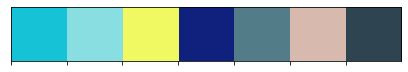

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
import plotly.express as px

my_colors = ["#16c2d5", "#89dee2", "#f0f961", "#10217d", "#527c88", "#d7baad", "#2e4450"]
sns.palplot(sns.color_palette(my_colors))
plt.show()

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Dhanasree-Rajamani/Data-Mining/main/Data%20Mining%20Assignment%202/DataMining_Datasets/Synthetic%20Data.csv")

About the Dataset

Here we have used Auto ViML for the insurance dataset. The data set consists of the following parameters:
	
	
  - Age: Age of the primary beneficiary
	
  - Sex: Sex of the primary person
	
  - BMI: Body Mass Index of the primary person
	
  - Dependants: Number of children/dependants covered in the insurance
	
  - Smoker: Whether the person is a smoker or not
  
  - Region: The region in which the person lives in the US

  - Premium(Target): The target variable (which is predicted) - denotes the cost of the health insurance premium paid annually by the customer

The target variable is to predict the insurance premium to be charged for the customer based on the other given features. Auto ViML helps determine best ml model for this dataset, the model accuracy, precision, feature importance etc.

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,52,female,32.6,0,no,northwest,9641.14
1,26,female,23.6,1,no,northwest,8209.23
2,24,male,22.7,3,no,northwest,8987.67
3,25,male,31.3,2,no,southwest,4503.26
4,26,female,40.9,0,no,southeast,1581.19


Rename expenses column name to premium.

In [4]:
df = df.rename(columns={'expenses': 'premium'})

In [5]:
df = df.rename(columns={'children': 'dependants'})

In [6]:
df.head()

,age,sex,bmi,dependants,smoker,region,premium
0,52,female,32.6,0,no,northwest,9641.14
1,26,female,23.6,1,no,northwest,8209.23
2,24,male,22.7,3,no,northwest,8987.67
3,25,male,31.3,2,no,southwest,4503.26
4,26,female,40.9,0,no,southeast,1581.19


In [7]:
df.tail()

,age,sex,bmi,dependants,smoker,region,premium
2670,50,male,31.0,3,no,northwest,10600.55
2671,18,female,31.9,0,no,northeast,2205.98
2672,18,female,36.9,0,no,southeast,1629.83
2673,21,female,25.8,0,no,southwest,2007.95
2674,61,female,29.1,0,yes,northwest,29141.36


In [8]:
print("Total Records: ", df.shape[0])
print("Total Features: ", df.shape[1])

Total Records:  2675
Total Features:  7


In [9]:
df.dtypes

age             int64
sex            object
bmi           float64
dependants      int64
smoker         object
region         object
premium       float64
dtype: object

* **Categorical** - sex(female, male), smoker(yes, no), region

* **Numerical** - age, bmi, children, premium

Note: Age, children are not actual numerical. We have to convert them to categorical(Using one hot encoding)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2675 entries, 0 to 2674
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         2675 non-null   int64  
 1   sex         2675 non-null   object 
 2   bmi         2675 non-null   float64
 3   dependants  2675 non-null   int64  
 4   smoker      2675 non-null   object 
 5   region      2675 non-null   object 
 6   premium     2675 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 146.4+ KB


**What is BMI 🤔 ?**

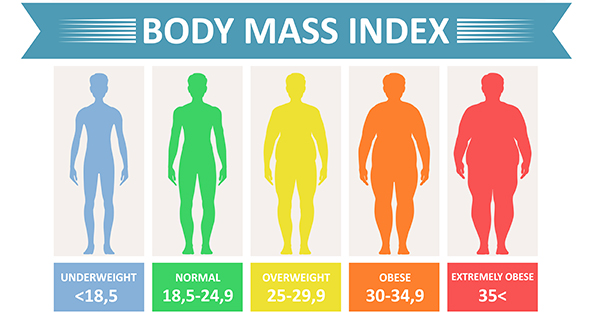

* **Missing Values**

In [11]:
df.isna().any()

age           False
sex           False
bmi           False
dependants    False
smoker        False
region        False
premium       False
dtype: bool

In [12]:
df.isnull().sum()

age           0
sex           0
bmi           0
dependants    0
smoker        0
region        0
premium       0
dtype: int64

There are no missing values. Dataset looks pretty much clean.

In [13]:
df['premium'].describe()

count     2675.000000
mean     13105.928161
std      12273.544529
min       1121.870000
25%       4503.960000
50%       8944.120000
75%      16100.215000
max      63770.430000
Name: premium, dtype: float64

Min premium is 1121 and Max is 63770

* **Let's see the correlation between each numerical feature based on correlation co-efficient**

In [14]:
corr_mat = df.corr()

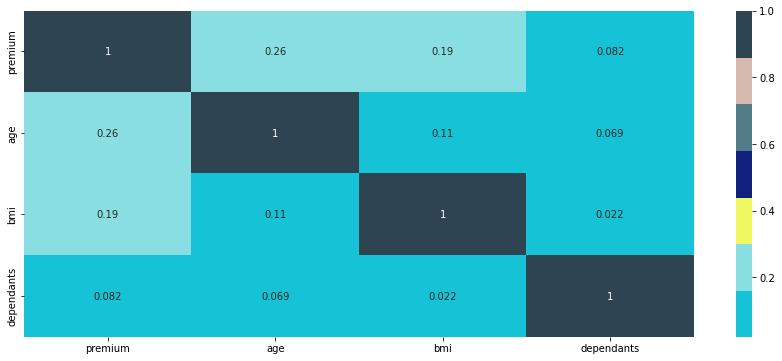

In [15]:
top_featu = corr_mat.nlargest(7, 'premium').index

# Create color map ranging between two colours
cmap = sns.diverging_palette(220, 10, as_cmap=True)

coef = np.corrcoef(df[top_featu].T)
plt.subplots(figsize=(15, 6))
sns.heatmap(coef, cmap=my_colors, annot=True, xticklabels=top_featu, yticklabels=top_featu)

From this heatmap, premium is 30% correlated to age and 20% to bmi

In [16]:
fig = px.scatter(df,
                x="dependants",
                y="premium",
                hover_data=["dependants"],
                width=800,
                height=500,
                title="dependants vs premium")

fig.update_traces(marker_size=5)
fig.show()

Even if there are no dependants, premium seems to be high. May be they are smokers or they have major illnesses or diseases.

In [17]:
fig = px.scatter(df,
                x="age",
                y="premium",
                hover_data=["age"],
                width=800,
                height=500,
                title="Age vs premium")

fig.update_traces(marker_size=5)
fig.show()

The general trend seems to be that medical expenses increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical expenses

In [18]:
fig = px.scatter(df,
                x="age",
                y="premium",
                color="smoker",
                opacity=0.8,
                hover_data=["sex"],
                width=800,
                height=500,
                title="Age vs premium")

fig.update_traces(marker_size=5)
fig.show()

We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

* The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical expenses compared to others

* The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".

* The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.

In [19]:
fig = px.scatter(df,
                x="bmi",
                y="premium",
                color="smoker",
                hover_data=['sex'],
                opacity=0.8,
                width=800,
                height=500,
                title="BMI Vs Premium")

fig.update_traces(marker_size=5)
fig.show()                

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical expenses. However, medical expenses seem to be significantly higher for smokers with a BMI greater than 30.

* **Now lets visualize the correlation of each categorical feature to premium**

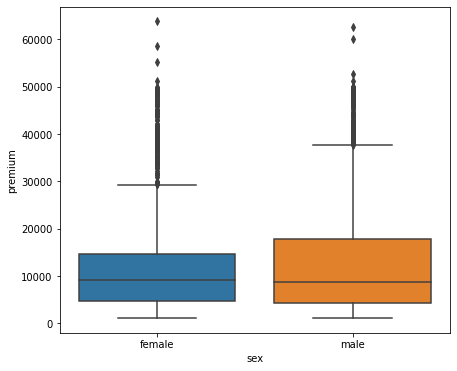

In [20]:
var = 'sex'
data = pd.concat([df[var], df['premium']], axis=1)

plt.subplots(figsize=(7, 6))
fig = sns.boxplot(x=var, y='premium', data = data) 

From this box plot, Although median looks quite same , 75% of female premium is less than male.

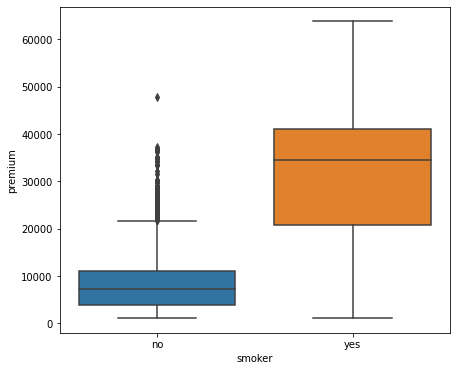

In [21]:
var = 'smoker'
data = pd.concat([df[var], df['premium']], axis=1)

plt.subplots(figsize=(7, 6))
fig = sns.boxplot(x=var, y='premium', data = data) 

From this, a person who smokes tend to pay more premium than non-smoker

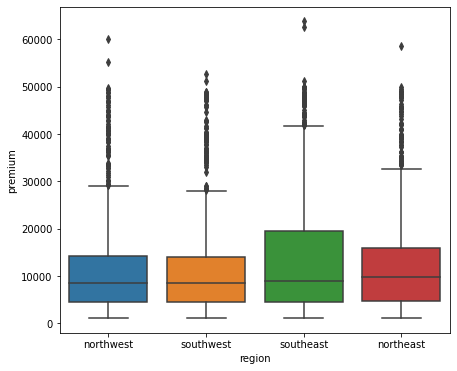

In [22]:
var = 'region'
data = pd.concat([df[var], df['premium']], axis=1)

plt.subplots(figsize=(7, 6))
fig = sns.boxplot(x=var, y='premium', data = data) 

There is not much diff in median of all regions premium.

* **Distribution of each feature w.r.t premium**

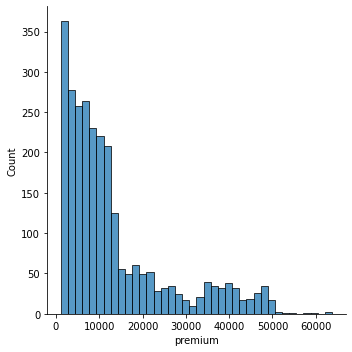

In [23]:
sns.displot(df['premium'])
plt.show()

For most customers, the annual medical expenses are under 10k. Only a small fraction of customer have higher medical expenses.

In [24]:
print("Skewness: %f" % df['premium'].skew())

Skewness: 1.509560


👍 The rule of thumb seems to be: If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.

From this it is clear that premium data is highly skewed.

We can say that, premium data is:
* Deviated from the normal distribution
* Has positive skewness
* And shows peakedness

So, we need to normalize the data using Normalizing techniques (scaling, log-scaling, z-score)

In [25]:
print("Kurtosis: %f" % df['premium'].kurt())

Kurtosis: 1.432549


positive kurtosis indicates a "heavy-tailed" distribution and negative kurtosis indicates a "light tailed" distribution.

From this, our data is heavily tailed.

* **Similarly lets check how the other features are distributed**

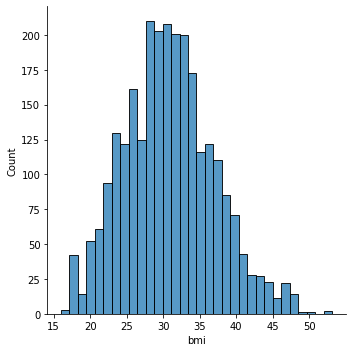

In [26]:
sns.displot(df['bmi'])
plt.show()

In [27]:
print("Skewness: %f" % df['bmi'].skew())
print("Kurtosis: %f" % df['bmi'].kurt())

Skewness: 0.275324
Kurtosis: -0.051229


This data looks fairly symmetrical and negative kurtosis indicates that the data is lightly tailed

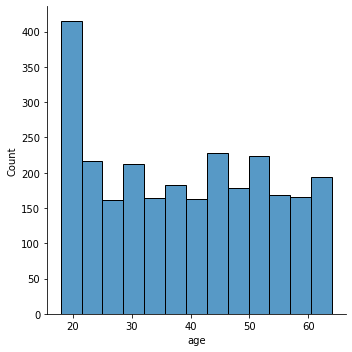

In [28]:
sns.displot(df['age'])
plt.show()

In [29]:
df['age'].value_counts()

18    149
19    132
20     70
23     65
52     64
21     64
46     64
47     61
40     60
49     60
27     60
45     59
54     58
48     57
34     57
41     57
64     57
33     57
32     56
51     56
56     56
29     56
55     55
30     54
36     54
37     54
50     53
26     53
44     53
43     52
53     51
22     51
24     51
35     50
25     50
62     48
28     48
57     47
31     47
42     46
63     45
61     44
59     42
58     42
38     39
39     36
60     35
Name: age, dtype: int64

In [30]:
df.head()

,age,sex,bmi,dependants,smoker,region,premium
0,52,female,32.6,0,no,northwest,9641.14
1,26,female,23.6,1,no,northwest,8209.23
2,24,male,22.7,3,no,northwest,8987.67
3,25,male,31.3,2,no,southwest,4503.26
4,26,female,40.9,0,no,southeast,1581.19


   age    premium
0   64  14343.680
1   63  13981.850
2   62  13460.240
3   61  13279.450
4   60  13204.290
5   59  13083.465
6   54  12100.985
7   57  12032.330
8   56  11950.345
9   55  11881.360


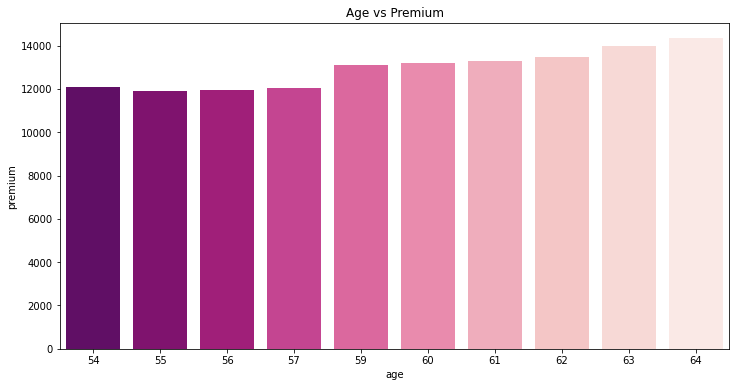

In [31]:
ages = df.groupby('age').premium.median().sort_values(ascending=False).head(10).reset_index()
ages.columns = ["age", "premium"]
print(ages)
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(data=ages, x="age", y="premium", palette = 'RdPu_r')

plt.title('Age vs Premium');

      sex   premium
0  female  9101.800
1    male  8727.705


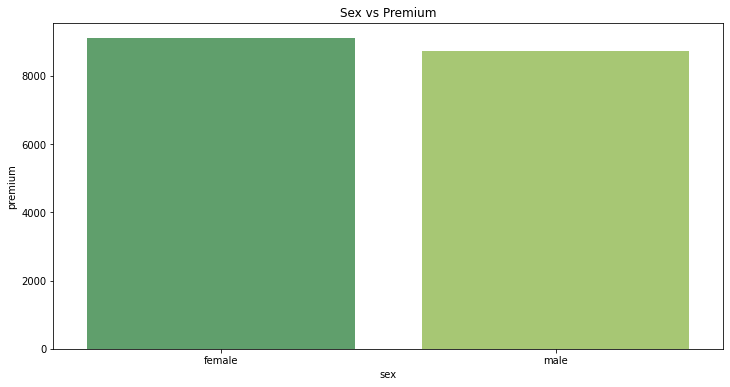

In [32]:
sexes = df.groupby('sex').premium.median().sort_values(ascending=False).head(10).reset_index()
sexes.columns = ["sex", "premium"]
print(sexes)
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(data=sexes, x="sex", y="premium", palette = 'summer')

plt.title('Sex vs Premium');

    bmi    premium
0  44.5  49753.440
1  46.3  48837.220
2  44.1  48285.100
3  40.6  47125.600
4  46.2  45863.210
5  52.6  44501.400
6  47.6  43011.685
7  45.5  42112.240
8  35.0  41034.220
9  42.8  40904.200


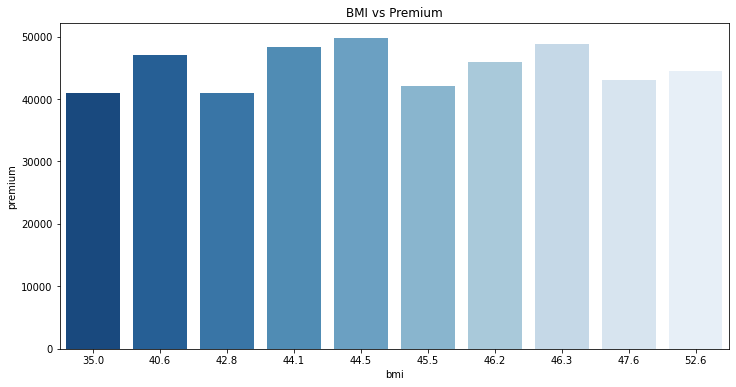

In [33]:
bmis = df.groupby('bmi').premium.median().sort_values(ascending=False).head(10).reset_index()
bmis.columns = ["bmi", "premium"]
print(bmis)
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(data=bmis, x="bmi", y="premium", palette = 'Blues_r')

plt.title('BMI vs Premium');

   dependants    premium
0           4  10736.870
1           3  10510.495
2           0   9212.520
3           5   8815.965
4           2   8733.230
5           1   8065.475


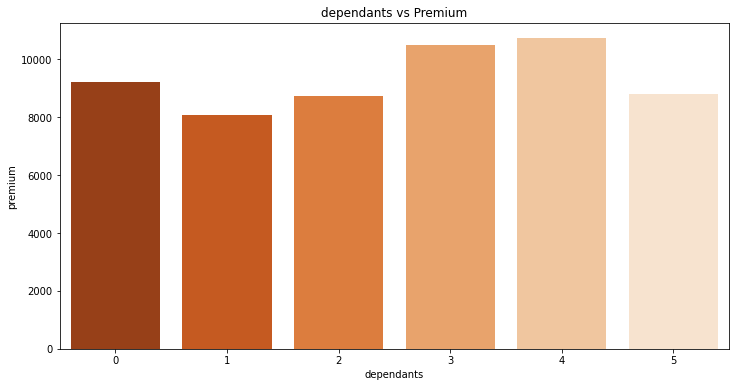

In [34]:
dependants = df.groupby('dependants').premium.median().sort_values(ascending=False).head(10).reset_index()
dependants.columns = ["dependants", "premium"]
print(dependants)
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(data=dependants, x="dependants", y="premium", palette = 'Oranges_r')

plt.title('dependants vs Premium');

  smoker   premium
0    yes  34427.44
1     no   7140.25


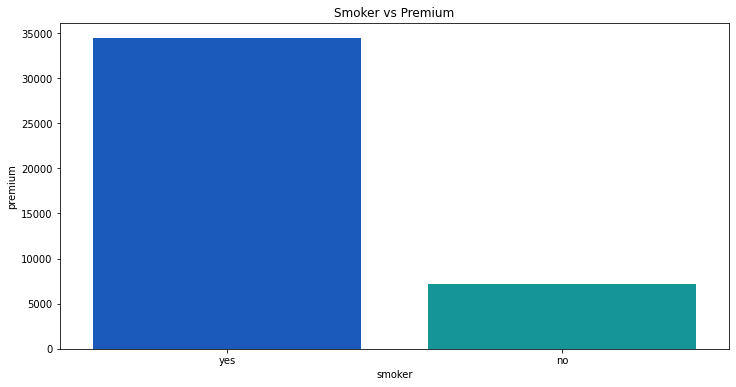

In [35]:
smokers = df.groupby('smoker').premium.median().sort_values(ascending=False).head(10).reset_index()
smokers.columns = ["smoker", "premium"]
print(smokers)
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(data=smokers, x="smoker", y="premium", palette = 'winter')

plt.title('Smoker vs Premium');

      region   premium
0  northeast  9775.025
1  southeast  8871.150
2  southwest  8551.350
3  northwest  8446.860
0    northeast
1    southeast
2    southwest
3    northwest
Name: region, dtype: object


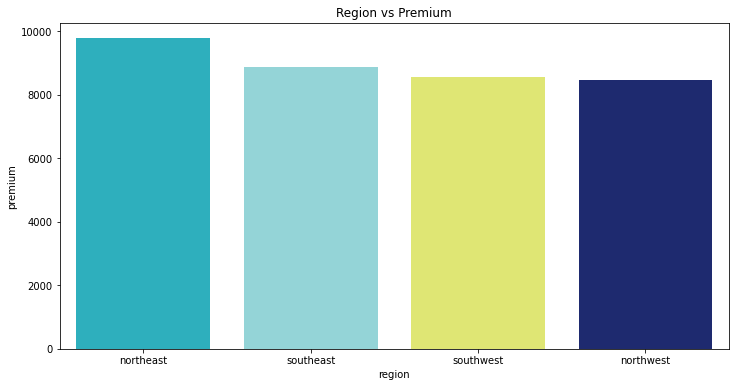

In [36]:
regions = df.groupby('region').premium.median().sort_values(ascending=False).head(10).reset_index()
regions.columns = ["region", "premium"]
print(regions)
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(data=regions, x="region", y="premium", palette = my_colors)

plt.title('Region vs Premium');

print(regions['region'])

# Feature Engineering
Performing feature engineering to understand the different features in the dataset, and their relationship with the target variable

It helps us understand the importance of every feature in the dataset

Featurewiz identifies the most important features, and reduces the dataset to have top 4 important features

We have PCA as well to determine the most important features and perform dimensionality reduction

###FeatureWiz

In [37]:
from sklearn.preprocessing import LabelEncoder
cols = list(df.dtypes[df.dtypes == 'object'].index)
df_enc = df.copy()
for c in cols:
  label = LabelEncoder()
  label.fit(list(df[c].values))
  df_enc[c] = label.transform(list(df_enc[c].values))

In [38]:
from featurewiz import featurewiz

Imported 0.2.03 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



In [39]:
df_enc.head()

,age,sex,bmi,dependants,smoker,region,premium
0,52,0,32.6,0,0,1,9641.14
1,26,0,23.6,1,0,1,8209.23
2,24,1,22.7,3,0,1,8987.67
3,25,1,31.3,2,0,3,4503.26
4,26,0,40.9,0,0,2,1581.19


############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Correlation Limit = 0.7
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Regression problem ####
    Loaded train data. Shape = (2675, 7)
#### Single_Label Regression problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
        No variables were removed since no ID or

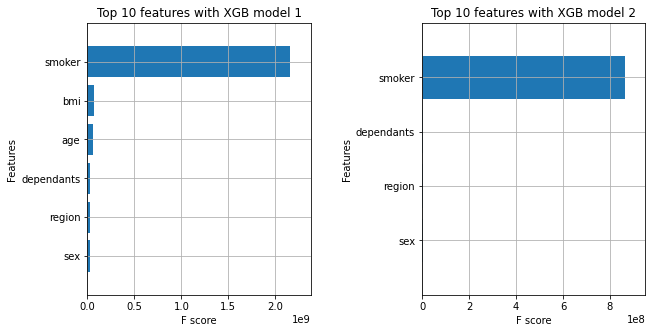

    Completed XGBoost feature selection in 0 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 4 important features:
['smoker', 'bmi', 'age', 'dependants']
Total Time taken for featurewiz selection = 3 seconds
Output contains a list of 4 important features and a train dataframe


In [40]:
target='premium'
features = featurewiz(df_enc, target, corr_limit=0.70, verbose = 2)

###PCA

In [41]:
from sklearn.decomposition import PCA

In [42]:
X = df_enc[['age', 'sex', 'bmi', 'dependants', 'smoker', 'region']]
y = df_enc['premium']

In [43]:
pca = PCA(whiten=True)
pca.fit(X)
variance = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

array([0.83250916, 0.98744313, 0.99337945, 0.99828207, 0.99932434,
       1.        ])

In [44]:
X.columns

Index(['age', 'sex', 'bmi', 'dependants', 'smoker', 'region'], dtype='object')

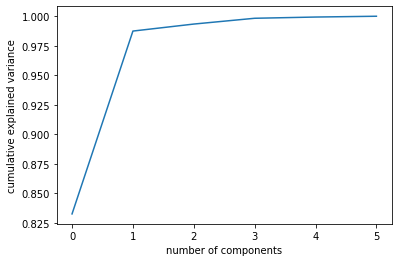

In [45]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

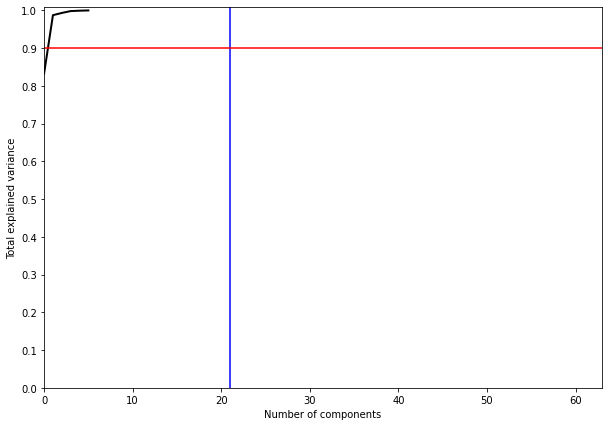

In [46]:
pca = PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show();

In [47]:
pca= PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.9975) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

The number of dimensions required to preserve 90% of variance is 4


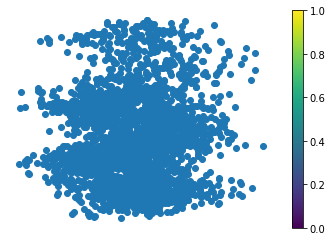

In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(X)         
PCA_train_x = PCA(2).fit_transform(train_scaled)
plt.scatter(PCA_train_x[:, 0], PCA_train_x[:, 1], cmap="copper_r")
plt.axis('off')
plt.colorbar()
plt.show()

# Normalization

min 1121.87
median 8944.12
max 63770.43


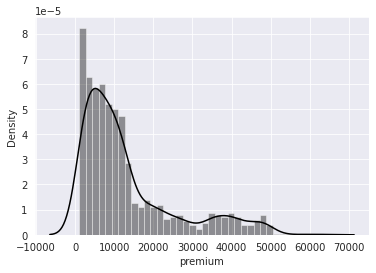

In [49]:
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(df['premium'],color='k')
print("min",df['premium'].min())
print("median",df['premium'].median())
print("max",df['premium'].max())

Observing the above graph for insurance premium, it varies from 1121.87 to 63770.43, it seems to be significantly skewed as the median 8944.12 (50 percentile) is much lower than the maximum value 63770.43.

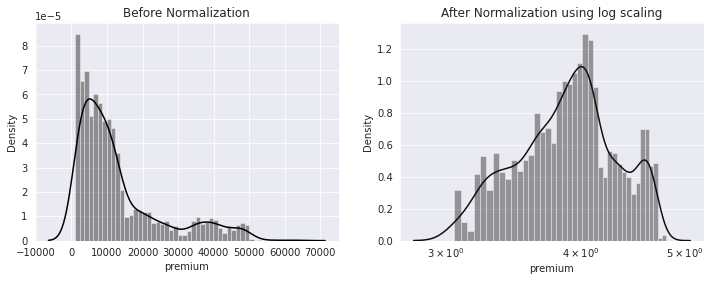

In [50]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['premium'],bins=50,color='k',ax=ax)
ax.set_title('Before Normalization')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['premium']),bins=40,color='#0f0f0f',ax=ax)
ax.set_title('After Normalization using log scaling')
ax.set_xscale('log')

* **Log Scaling**
Log scaling is helpful when a handful of values have many points, while most other values have few points. This data distribution is known as the power law distribution. Observing the above graph, data distribution of insurance premium follows power law distribution. Hence, Log scaling is used to normalize.

Log scaling changes the distribution, helping to improve linear model performance.


In [51]:
X = df.drop(['premium'], axis=1)
y = df['premium']

In [52]:
dataset = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(dataset.index)

print('Data for Modeling: ' + str(dataset.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (2408, 7)
Unseen Data For Predictions: (267, 7)


In [53]:
df.head(10)

,age,sex,bmi,dependants,smoker,region,premium
0,52,female,32.6,0,no,northwest,9641.14
1,26,female,23.6,1,no,northwest,8209.23
2,24,male,22.7,3,no,northwest,8987.67
3,25,male,31.3,2,no,southwest,4503.26
4,26,female,40.9,0,no,southeast,1581.19
5,31,female,26.1,2,no,northeast,4306.18
6,43,male,34.5,1,yes,northwest,40565.87
7,57,male,30.4,1,no,northwest,9816.62
8,21,male,30.5,0,no,southeast,1974.56
9,32,male,33.3,1,no,southeast,5487.26


# Standard Scalar

The StandardScaler will transform data such that its distribution will have a mean value 0 and standard deviation of 1.
This is done feature-wise (in other words independently for each column of the data).
Given the distribution of the data, each value in the dataset will have the mean value subtracted, and then divided by the standard deviation of the feature in dataset

In [54]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import lazypredict
from sklearn.metrics import mean_squared_error,r2_score, accuracy_score
import pickle

In [55]:
# Creating new variables for numerical attributes/columns
numeric_features = ['age', 'bmi', 'dependants']
# Making pipeline for scaling down numerical features
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Creating new variables for categorical attributes/columns
categorical_features = ['sex', 'smoker','region']
# MAking pipeling for Encoding categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Creating new variable for these numerical & categorical features pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [56]:
# Splitting the dataset for training and testing the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Let us check shape of the training & test set
print(X_train.shape, y_test.shape)

(2140, 6) (535,)


# Model
Regression can be defined as a Machine learning problem where we have to predict discrete values like price, Rating, Fees, etc.

* Pycaret
* LazyPredict
* SKlearn 

#Linear Regression

In [58]:
linear_reg = Pipeline(steps=[('prepocessor', preprocessor), ('linear_regressor', LinearRegression())])

linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)


linear_reg_mse = mean_squared_error(y_test, y_pred)
linear_reg_rmse = mean_squared_error(y_test, y_pred, squared=False)
linear_reg_r2_score = r2_score(y_test, y_pred)

# Evaluation Metrics
print("The Mean Squared Error using Linear Regression :{}".format(linear_reg_mse))
print(('The Root Mean Squared Error using Linear Regression :{}'.format(linear_reg_rmse)))
print(('The accuracy using Linear Regression :{}'.format(linear_reg_r2_score)))

The Mean Squared Error using Linear Regression :50845739.31079207
The Root Mean Squared Error using Linear Regression :7130.619840574315
The accuracy using Linear Regression :0.6584664882634454


#Decision Tree

In [59]:
decision_tree = Pipeline(steps=[('preprocessor', preprocessor),
                      ('decision_tree_regressor', DecisionTreeRegressor(max_depth=4, min_samples_split=4,random_state=42 ))])
decision_tree.fit(X_train, y_train)
# Predicting the model
y_pred1 = decision_tree.predict(X_test)
# Evaluation Metrics
decision_tree_mse = mean_squared_error(y_test, y_pred)
decision_tree_rmse = mean_squared_error(y_test, y_pred1, squared=False)
decision_tree_r2_score = r2_score(y_test, y_pred1)

print("The Mean Squared Error using Decision Tree Regressor : {}".format(decision_tree_mse))
print("The Root Mean Squared Error using Decision Tree Regressor : {}".format(decision_tree_rmse))
print("The r2_score using Decision Tree Regressor : {}".format(decision_tree_r2_score))

The Mean Squared Error using Decision Tree Regressor : 50845739.31079207
The Root Mean Squared Error using Decision Tree Regressor : 6235.8372849546195
The r2_score using Decision Tree Regressor : 0.7388029269451415


#Random Forest

In [60]:
random_forest_reg = Pipeline(steps=[('preprocessor', preprocessor),
                        ('random_forest_regressor', RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42))])
random_forest_reg.fit(X_train, y_train)                        

# Predicting the model
y_pred2 = random_forest_reg.predict(X_test)

# Evaluation Metrics
random_forest_mse = mean_squared_error(y_test, y_pred2)
random_forest_rmse = mean_squared_error(y_test, y_pred2, squared=False)
random_forest_r2_score = r2_score(y_test, y_pred2)

print("The Mean Squared Error using Random Forest Regressor : {}".format(random_forest_mse))
print("The Root Mean Squared Error using Random Forest Regressor : {}".format(random_forest_rmse))
print("The r2_score Error using Random Forest Regressor : {}".format(random_forest_r2_score))

The Mean Squared Error using Random Forest Regressor : 38380930.64179832
The Root Mean Squared Error using Random Forest Regressor : 6195.23451063786
The r2_score Error using Random Forest Regressor : 0.7421932652864733


#Gradient Boosting

In [61]:
gradient_boosting_reg = Pipeline(steps=[('preprocessor', preprocessor),
                        ('gradient_boosting' , GradientBoostingRegressor())])

gradient_boosting_reg.fit(X_train, y_train)

# Predicting the model
y_pred3 = gradient_boosting_reg.predict(X_test)

# Evaluation Metrics
gradient_boosting_mse = mean_squared_error(y_test, y_pred3)
gradient_boosting_rmse = mean_squared_error(y_test, y_pred3, squared=False)
gradient_boosting_r2_score = r2_score(y_test, y_pred3)

print("The Mean Squared Error using Gradient Boosting Regressor : {}".format(gradient_boosting_mse))
print("The Root Mean Squared Error using Gradient Boosting Regressor : {}".format(gradient_boosting_rmse))
print("The r2_sccore using Gradient Boosting Regressor : {}".format(gradient_boosting_r2_score))

The Mean Squared Error using Gradient Boosting Regressor : 38684480.984215476
The Root Mean Squared Error using Gradient Boosting Regressor : 6219.684958598424
The r2_sccore using Gradient Boosting Regressor : 0.7401543016320975


In [62]:
gradient_boosting_reg = Pipeline(steps=[('preprocessor', preprocessor),
                        ('gradient_boosting' , GradientBoostingRegressor(n_estimators=41, max_depth=3, min_samples_split=4, random_state=42))])

gradient_boosting_reg.fit(X_train, y_train)

# Predicting the model
y_pred3 = gradient_boosting_reg.predict(X_test)

# Evaluation Metrics
gradient_boosting_mse = mean_squared_error(y_test, y_pred3)
gradient_boosting_rmse = mean_squared_error(y_test, y_pred3, squared=False)
gradient_boosting_r2_score = r2_score(y_test, y_pred3)

#KNN

In [63]:
knn = Pipeline(steps=[('preprocessor', preprocessor),
                ('knn', KNeighborsRegressor(n_neighbors=10))])

knn.fit(X_train, y_train)

# Predictiong The model
y_pred4 = knn.predict(X_test)

# Evaluation Metrics
knn_mse = mean_squared_error(y_test, y_pred4)
knn_rmse = mean_squared_error(y_test, y_pred4, squared=False)
knn_r2_score = r2_score(y_test, y_pred4)

print("The mean squared error using KNN is {}".format(knn_mse))
print("The root mean squared error using KNN is {}".format(knn_rmse))
print("The r2_score using KNN is {}".format(knn_r2_score))

The mean squared error using KNN is 45712921.22910608
The root mean squared error using KNN is 6761.133132035346
The r2_score using KNN is 0.6929438979403467


#XGBoost

In [64]:
xgb_reg = Pipeline(steps=[('preprocessor', preprocessor),
                ('xgb', xgb.XGBRegressor())])

xgb_reg.fit(X_train, y_train)

# Predicting the model
y_pred5 = xgb_reg.predict(X_test)

# Evaluation Metrics
xgb_reg_mse = mean_squared_error(y_test, y_pred5)
xgb_reg_rmse = mean_squared_error(y_test, y_pred5, squared=False)
xgb_reg_r2_score = r2_score(y_test, y_pred5)

print("The mean square error using XGBoost is {}".format(xgb_reg_mse))
print("The root mean_squared error using XGBoost is {}".format(xgb_reg_rmse))
print("The r2 score using XGBoost is {}".format(xgb_reg_r2_score))

[04:36:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The mean square error using XGBoost is 38424823.09713324
The root mean_squared error using XGBoost is 6198.7759353870215
The r2 score using XGBoost is 0.7418984373498069


#Model Performance Evaluation


A loss function specifies a penalty for an incorrect estimate from a statistical model. Loss functions specify the penalty as a function of the difference between the estimate and the true value. RMSE is used as loss function.

**RMSE**

Mean squared error is finding the squared difference between actual and predicted value. **Root mean squared** **error** is square root of mean squared error

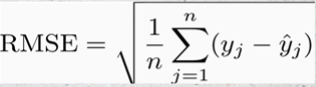

The output value we get is in the same unit as the required output variable which makes interpretation of loss easy

**R2** 

R2 score is zero then the above regression line by mean line is equal means 1 so 1-1 is zero. So, in this case, both lines are overlapping means model performance is worst, It is not capable to take advantage of the output column.

Now the second case is when the R2 score is 1, it means when the division term is zero and it will happen when the regression line does not make any mistake, it is perfect. In the real world, it is not possible.

So we can conclude that as our regression line moves towards perfection, R2 score move towards one. And the model performance improves.

The normal case is when the R2 score is between zero and one like 0.8 which means your model is capable to explain 80 per cent of the variance of data.

In [65]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'Random Forest',
               'Gradient Boosting', 'KNN', 'XGBoost'],
    'RMSE' : [linear_reg_rmse, decision_tree_rmse, random_forest_rmse,
            gradient_boosting_rmse, knn_rmse, xgb_reg_rmse],
    'r2_score' : [linear_reg_r2_score, decision_tree_r2_score, random_forest_r2_score, 
    gradient_boosting_r2_score, knn_r2_score, xgb_reg_r2_score]
})

models.sort_values(by='RMSE', ascending=True)

,Model,RMSE,r2_score
3,Gradient Boosting,6169.534990,0.744328
2,Random Forest,6195.234511,0.742193
5,XGBoost,6198.775935,0.741898
1,Decision Tree,6235.837285,0.738803
4,KNN,6761.133132,0.692944
0,Linear Regression,7130.619841,0.658466


From the above observation we can say that the performance (RMSE & R-sqaured) of Gradient boosting model is good as compared to other models. So we will save Gradient boosting model for further testing of the data using pickle library.

In [66]:
pickle.dump(gradient_boosting_reg, open('gradient_boosting_regressor_model.pkl', 'wb'))

#Pycaret

PyCaret is an open-source, low-code machine learning library in Python that helps in preparing data and deploying single or multiple models for comparison

In [67]:
#!pip install pycaret
#!pip install numpy
#!pip install numba --upgrade

In [68]:
import numpy as np
from pycaret.regression import setup,compare_models,create_model,predict_model,save_model,create_app

In [69]:
from pycaret.regression import load_model

In [70]:
reg = setup(data = df, target = 'premium', session_id=1,
                  normalize = True, transformation = True, transform_target = True, 
                  combine_rare_levels = True, rare_level_threshold = 0.05,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95, 
                  log_experiment = True, experiment_name = 'insurance_premium_regression') 

,Description,Value
0,session_id,1
1,Target,premium
2,Original Data,"(2675, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1872, 14)"


INFO:logs:Logging experiment in MLFlow
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='premium',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                ('dummy', Dummify(target='premium')),
                ('fix_perfect', Remove_100(target='premium')),
                ('clean_names'

In [71]:
best_models = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,3040.3992,3.207460e+07,5631.6634,0.7792,0.4449,0.2969,0.120
lightgbm,Light Gradient Boosting Machine,3261.4253,3.206131e+07,5639.7902,0.7791,0.4625,0.3244,0.130
ada,AdaBoost Regressor,3339.4732,3.314276e+07,5733.5344,0.7712,0.4793,0.3778,0.035
rf,Random Forest Regressor,3293.9557,3.431407e+07,5831.7972,0.7630,0.4703,0.3300,0.457
et,Extra Trees Regressor,3554.9968,3.839190e+07,6172.8621,0.7310,0.5063,0.3667,0.319
omp,Orthogonal Matching Pursuit,5729.9541,6.257468e+07,7880.0085,0.5719,0.6905,0.6886,0.026
dt,Decision Tree Regressor,4557.2528,6.304957e+07,7900.5682,0.5599,0.6233,0.5042,0.032
br,Bayesian Ridge,4527.7932,7.107495e+07,8386.2339,0.5111,0.4988,0.3721,0.031
ridge,Ridge Regression,4528.5211,7.111216e+07,8388.4496,0.5108,0.4988,0.3721,0.025
lr,Linear Regression,4537.1748,7.154349e+07,8414.0304,0.5078,0.4988,0.3722,0.476


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:PowerTransformedTargetRegressor(alpha=0.9, ccp_alpha=0.0,
                                criterion='friedman_mse', init=None,
                                learning_rate=0.1, loss='ls', max_depth=3,
                                max_features=None, max_leaf_nodes=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_iter_no_change=None,
                                power_transformer_method...
                                                                    max_leaf_nodes=None,
                                                                    min_impurity_decrease=0.0,
                                           

In [72]:
gbr_model = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2543.7635,2.329287e+07,4826.2689,0.7824,0.4561,0.3447
1,2613.4111,3.006590e+07,5483.2378,0.7403,0.3906,0.2501
2,3090.1513,3.018460e+07,5494.0510,0.7988,0.4688,0.2960
3,2681.7537,2.103051e+07,4585.9034,0.8333,0.3879,0.2629
4,3216.8741,3.800446e+07,6164.7758,0.7345,0.4606,0.2909
5,3800.0391,4.511474e+07,6716.7509,0.7658,0.4816,0.3120
6,2995.0834,3.315752e+07,5758.2564,0.8123,0.4244,0.2920
7,3400.5556,3.783595e+07,6151.0937,0.7890,0.4689,0.3252
8,3158.2749,2.925234e+07,5408.5437,0.8320,0.4588,0.2993


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:PowerTransformedTargetRegressor(alpha=0.9, ccp_alpha=0.0,
                                criterion='friedman_mse', init=None,
                                learning_rate=0.1, loss='ls', max_depth=3,
                                max_features=None, max_leaf_nodes=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_iter_no_change=None,
                                power_transformer_method...
                                                                    max_leaf_nodes=None,
                                                                    min_impurity_decrease=0.0,
                                           

Predicting using the created model on the test data

In [73]:
predict_data = predict_model(gbr_model, data = data_unseen)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=PowerTransformedTargetRegressor(alpha=0.9, ccp_alpha=0.0,
                                criterion='friedman_mse', init=None,
                                learning_rate=0.1, loss='ls', max_depth=3,
                                max_features=None, max_leaf_nodes=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_iter_no_change=None,
                                power_transformer_method...
                                                                    max_leaf_nodes=None,
                                                                    min_impurity_decrease=0.0,
                                                                    min_impurity_spli

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2570.0696,2.835395e+07,5324.8431,0.78,0.3776,0.2354


In [74]:
predict_data.head()

,age,sex,bmi,dependants,smoker,region,premium,Label
5,31,female,26.1,2,no,northeast,4306.18,6113.679638
11,30,male,26.8,1,no,northeast,4916.04,5390.229943
13,19,female,19.7,2,yes,southwest,21115.60,20215.026481
17,18,male,17.4,0,no,southwest,1410.46,1820.150313
18,39,female,46.8,1,no,northwest,4755.72,6308.073858


In [75]:
save_model(gbr_model, 'regression model')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=PowerTransformedTargetRegressor(alpha=0.9, ccp_alpha=0.0,
                                criterion='friedman_mse', init=None,
                                learning_rate=0.1, loss='ls', max_depth=3,
                                max_features=None, max_leaf_nodes=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_iter_no_change=None,
                                power_transformer_method...
                                                                    max_leaf_nodes=None,
                                                                    min_impurity_decrease=0.0,
                                                                    min_impurity_split=None,
  

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='premium',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                                                                      min_impurity_decrease=0.0,
                                                                                      min_impurity_split=None,
                                                                                      min

In [76]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
create_app(gbr_model)

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=data_before_preprocess)
INFO:logs:Global variable: data_before_preprocess returned as       age     sex   bmi  dependants smoker     region   premium
0      52  female  32.6           0     no  northwest   9641.14
1      26  female  23.6           1     no  northwest   8209.23
2      24    male  22.7           3     no  northwest   8987.67
3      25    male  31.3           2     no  southwest   4503.26
4      26  female  40.9           0     no  southeast   1581.19
...   ...     ...   ...         ...    ...        ...       ...
2670   50    male  31.0           3     no  northwest  10600.55
2671   18  female  31.9           0     no  northeast   2205.98
2672   18  female  36.9           0     no  southeast   1629.83
2673   21  female  25.8           0     no  southwest   2007.95
2674   61  female  29.1           0    yes  northwest  29141.36

[2675 rows x 7 columns]
INFO:logs:get_config() succesfully completed...........

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

#Lazy Predict

Lazy Predict : It is python library used to semi-automate Machine Learning task.
It helps to understand which models work better without any hyperparameter tuning.
After getting all accuracy we can choose the top 5 models and then apply hyperparameter tuning to them. 
It provides a Lazy Classifier to solve the classification problem and Lazy Regressor to solve the regression problem.

In [78]:
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle
import numpy as np

#boston = df.load_boston()
#X, y = shuffle(df, boston.target, random_state=13)
#X = X.astype(np.float32)

#offset = int(X.shape[0] * 0.9)

#X_train, y_train = X[:offset], y[:offset]
#X_test, y_test = X[offset:], y[offset:]

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

 98%|█████████▊| 40/41 [00:08<00:00,  5.61it/s]

[04:37:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 41/41 [00:08<00:00,  5.05it/s]

                               Adjusted R-Squared  R-Squared      RMSE  \
Model                                                                    
XGBRegressor                                 0.74       0.74   6198.78   
GradientBoostingRegressor                    0.74       0.74   6216.56   
HistGradientBoostingRegressor                0.73       0.73   6286.66   
LGBMRegressor                                0.73       0.73   6329.14   
RandomForestRegressor                        0.70       0.71   6606.60   
KNeighborsRegressor                          0.69       0.69   6779.05   
ExtraTreesRegressor                          0.68       0.69   6810.77   
BaggingRegressor                             0.68       0.68   6910.25   
PoissonRegressor                             0.67       0.67   7006.77   
SGDRegressor                                 0.66       0.66   7122.43   
LassoCV                                      0.65       0.66   7127.71   
BayesianRidge                         